In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
from sklearn.datasets import load_boston
df = load_boston()

In [3]:
df.keys()
# print(type(df))

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

print(df.DESCR)

In [4]:
boston = pd.DataFrame(df.data, columns=df.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# adding a new column
boston['MEDV'] = df.target # previously we have features now we have added target variables
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data preprocessing


In [6]:
boston.isnull().any().sum() # counting the null values

0

here we have 0 null values

## correlation matrix

<AxesSubplot:>

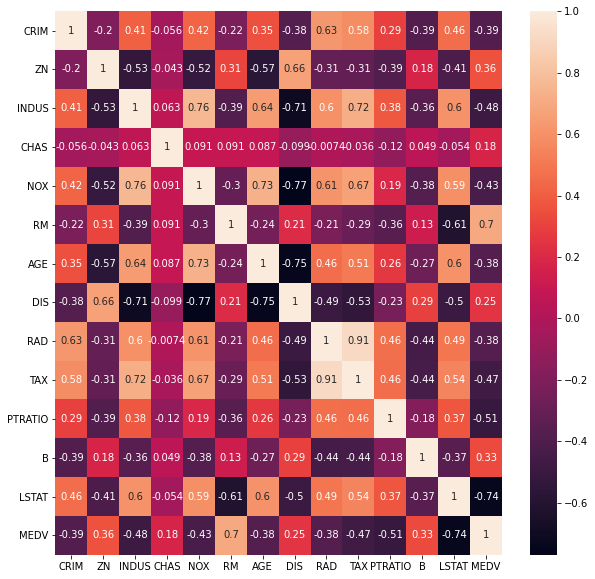

In [7]:
correlation_matrix = boston.corr() # created correlation matrix by dataset.corr() fxn

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True)

#### Visualising the relations of features along with the target using Scatter plot

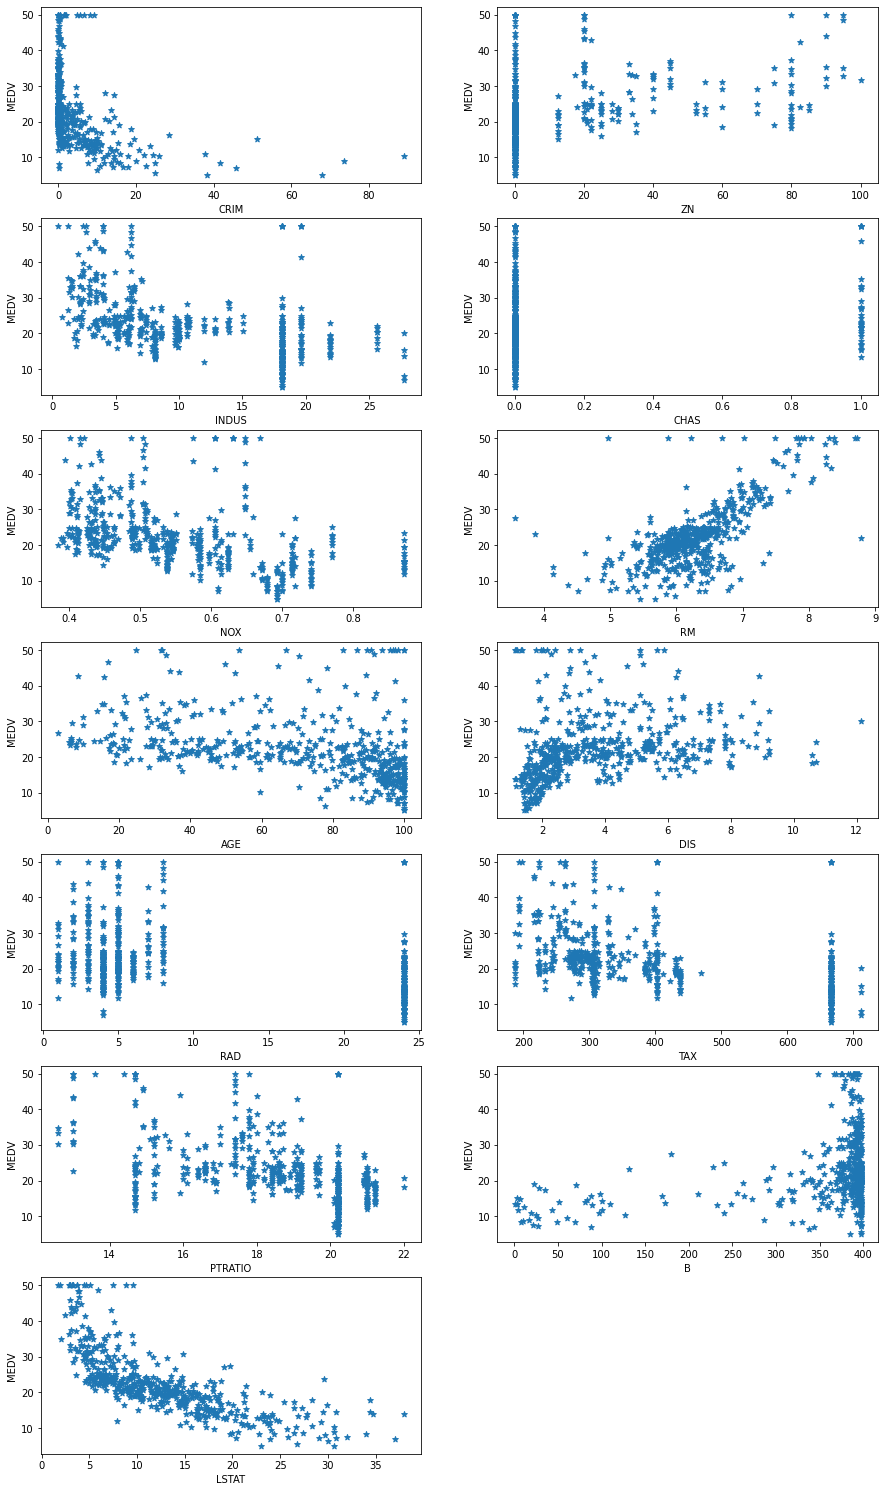

In [8]:
plt.figure(figsize=(15,50)) # setting size of figure to be plotted
features = df.feature_names
target = df.target
 
for i,col in enumerate(features):
    plt.subplot(len(features),2,i+1)
    x = boston[col]
    y = target
    plt.scatter(x,y,marker='*')
    plt.xlabel(col)
    plt.ylabel('MEDV')

Many features are nicely correlated. ex- LSTAT and RM are highly correlated. So we are taking those only 

In [9]:
# creating a different dataframe of required features
x = pd.DataFrame(boston[['LSTAT','RM']])
y = boston['MEDV']
x.head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state=5)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(430, 2)
(76, 2)
(430,)
(76,)


## Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [12]:
# Prediction with train data
y_train_predict = lin_model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train,y_train_predict)))
print("The model perfomance with Training data")
print("RMSE : {}",rmse)

# Prediction with test data
y_test_predict = lin_model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test,y_test_predict)))
print("\n \n \nThe model perfomance with Training data")
print("RMSE : {}",rmse)

The model perfomance with Training data
RMSE : {} 5.596970449422867

 
 
The model perfomance with Training data
RMSE : {} 5.178451251951529


In [13]:
x = boston.drop(['LSTAT','RM'],axis=1) # dropping the most relevent features from the dataset

### for making the features of higher degree we use polynomial function from sklearn

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x.drop('MEDV',axis=1)) # here we are dropping the target variable from dataset(features)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.15, random_state=5)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(430, 78)
(76, 78)
(430,)
(76,)


as we can see the no of columns is 78 ie the no of features rised(x1^2, x1*x2 etc.). Here we have taken multi power of the same feature to geet better possible lne with the same set of features.